In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

from matplotlib.patches import Rectangle

In [3]:
national = np.array([-0.39, -0.42, -0.29, -0.76,  0.34, -0.53,  0.67, -0.53, -0.19, -0.25,  0.33, -0.06, -0.01, -0.03])
own = np.array([-0.16, -0.29,  0.18,   1.2, -1.22,  1.46, -0.15, -0.26,  1.21,  -0.6, -0.84,  1.43,  0.98,  0.05])
point_label = np.array(["M1", "M2", "M3", "M4", "M5", "M6", "M7", "D1", "D2", "D3", "D4", "D5", "D6", "D7"])

In [2]:
uk_data = pd.read_csv("UK_All_Hospital_Quadrant_Data.csv")
uk_data.head()

,Provider Group Level based on AandE Type 1,Provider Code,Metrices Type,Metric,Label,SD away from Hospital Average,SD away from National Average
0,Bet Bottom & Top,R0A,Monthly,AandE_Attends_Type1,M1,-0.19,3.09
1,Bet Bottom & Top,R0A,Monthly,Attends_Under_4Hrs_Arr_To_Adm_Tfr_Disch_Type1,M2,0.15,2.07
2,Bet Bottom & Top,R0A,Monthly,Attends_Over_4Hrs_Arr_To_Adm_Tfr_Disch_Type1,M3,-0.50,3.69
3,Bet Bottom & Top,R0A,Monthly,Emerg_Adms_Via_Type1,M4,-1.64,1.42
4,Bet Bottom & Top,R0A,Monthly,Emerg_Adms_Not_Via_AandE,M5,-0.76,-0.57


In [5]:
# uk_data = uk_data[uk_data["Provider Group Level based on AandE Type 1"]!="Bet Bottom & Top"]
# uk_data.head()

In [3]:
uk_data = uk_data.replace("Daily_Avg_Bed_Occupancy>7 days","Daily_Avg_Bed_Occupancy_over_7_days")
uk_data = uk_data.replace("Daily_Avg_Bed_Occupancy>14 days","Daily_Avg_Bed_Occupancy_over_14_days")
uk_data = uk_data.replace("Daily_Avg_Bed_Occupancy>21 days","Daily_Avg_Bed_Occupancy_over_21_days")

In [4]:
uk_data["Metric"].unique()

array(['AandE_Attends_Type1',
       'Attends_Under_4Hrs_Arr_To_Adm_Tfr_Disch_Type1',
       'Attends_Over_4Hrs_Arr_To_Adm_Tfr_Disch_Type1',
       'Emerg_Adms_Via_Type1', 'Emerg_Adms_Not_Via_AandE',
       'Dec_To_Adm_4_to_12Hrs', 'Dec_To_Adm_Over_12Hrs',
       'Daily_Average_Staff_Absence', 'Arriving_by_ambulance',
       'Time_Lost_to_Ambulance_Handover_Delays_Hours',
       'Monthly_Avg_Patients_who_no_longer_meet_the_criteria_to_reside',
       'Daily_Avg_Bed_Occupancy_over_7_days',
       'Daily_Avg_Bed_Occupancy_over_14_days',
       'Daily_Avg_Bed_Occupancy_over_21_days'], dtype=object)

In [45]:
def scatter_plot_for_matrics(uk_data,matrics=["AandE_Attends_Type1"]):

    uk_data = uk_data[uk_data["Provider Group Level based on AandE Type 1"]!="Bet Bottom & Top"]
    uk_data = uk_data[uk_data["Metric"].isin(matrics)]

    

    good_indicators = ['AandE_Attends_Type1',
       'Attends_Under_4Hrs_Arr_To_Adm_Tfr_Disch_Type1',
       'Emerg_Adms_Via_Type1', 
       'Emerg_Adms_Not_Via_AandE',
       'Arriving_by_ambulance',]


    # Set the default seaborn style
    sns.set(rc={'figure.figsize':(16,10)})

    ax = plt.gca()

    r = (0, 0)
    g =(-4, -4)
    lr =(-4, 0)
    y =(0, -4)
    
    if matrics[0] in good_indicators:

        r = (-4, -4)
        g = (0, 0)
        lr =(0, -4)
        y = (-4, 0)


    # Add rectangle patches with background color
    rect1 = Rectangle(r, 4, 4, linewidth=1, edgecolor='r', facecolor='#cc3f2b')
    rect2 = Rectangle(g, 4, 4, linewidth=1, edgecolor='g', facecolor='#27a874')
    rect3 = Rectangle(lr, 4, 4, linewidth=1, edgecolor='r', facecolor='#d46155')
    rect4 = Rectangle(y, 4, 4, linewidth=1, edgecolor='y', facecolor='#ffbf00')

    # Add the rectangles to the plot
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    ax.add_patch(rect4)


    # plt.scatter(x, y, c=scatter_colors, s=40.0,marker="*")

    # Add vertical and horizontal lines
    plt.axvline(x=0, color='black', linestyle='--')  # Vertical line at x=0
    plt.axhline(y=0, color='black', linestyle='--')  # Horizontal line at y=0


    # Create the scatter plot using seaborn
    sns.scatterplot(
        data=uk_data, 
        x='SD away from Hospital Average', 
        y='SD away from National Average',  
        legend='brief', 
        style="Provider Group Level based on AandE Type 1",
        hue="Provider Group Level based on AandE Type 1",
        s=70,
        markers=['o', '^'],
        palette=['black','green']
        )

    # Set plot limits
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

    # fig, ax = plt.subplots()
    # ax.annotate('tessst', xy=(0,0), xytext=(0,0), xycoords='axes fraction', textcoords='offset points', ha='right')


    # for (xi, yi, pc) in zip(uk_data['SD away from Hospital Average'], uk_data['SD away from National Average'], uk_data["Provider Code"] ):
    #     plt.text(xi, yi, pc+"   ", va='top', ha='right', color="black", fontweight="semibold", fontsize=10, 
    #             #  bbox=dict(boxstyle='square,pad=0.5', fc='#ffffff50', ec='none') 
    #             )


    # Add labels and title
    # Add labels and title
    title = " ".join(str(item) for item in matrics[0].split('_'))
    plt.xlabel('SD away from Own avg')
    plt.ylabel('SD away from National avg')
    plt.title('Comparing Top vs Bottom 10% Hospitals ' + title + " Performance", fontsize=18)
    plt.legend(markerscale=2)

    # plt.imsave()
    plt.savefig('images/suggested_plots/quadrent_plots/onlydotplots/'+matrics[0]+'.png', dpi='figure', format=None)

    # Display the plot
    plt.show()

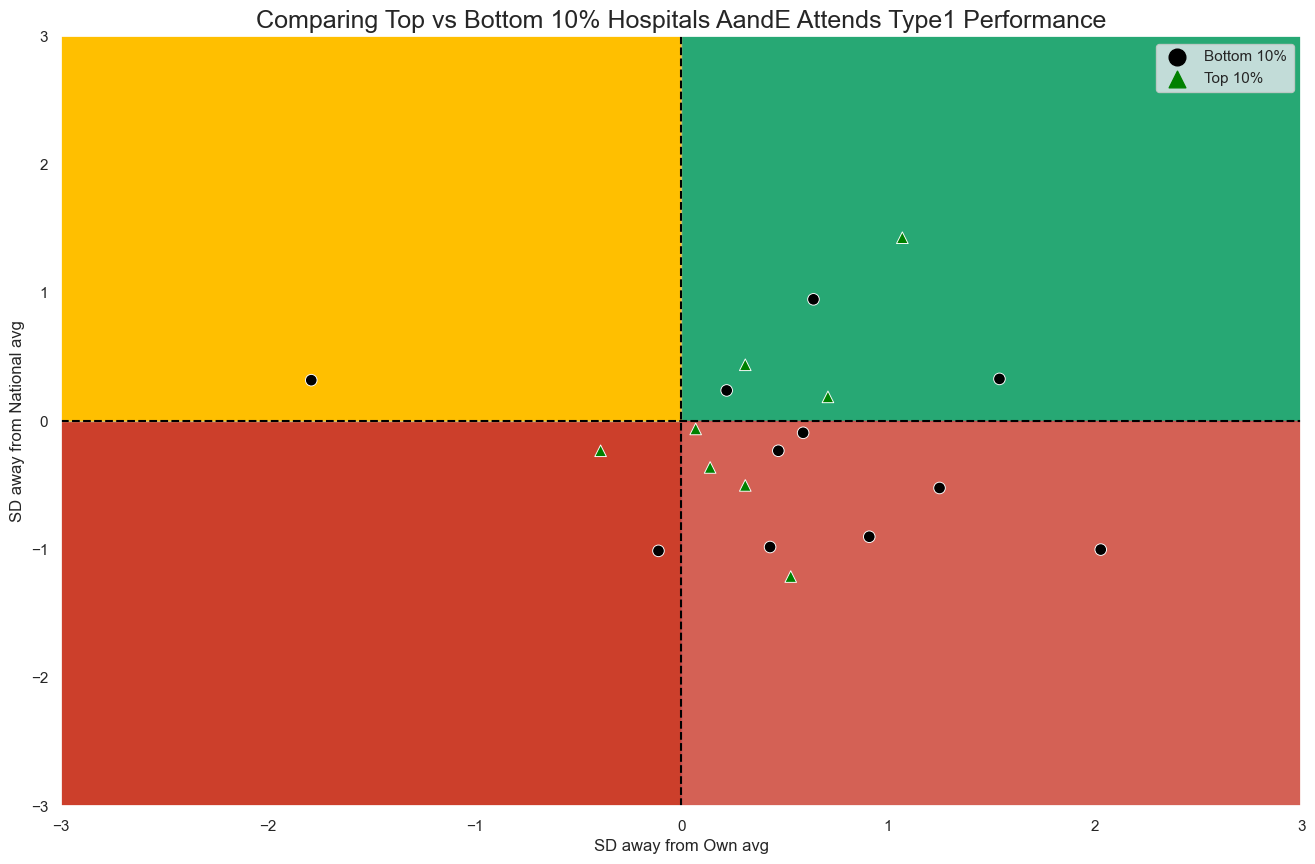

In [46]:
scatter_plot_for_matrics(uk_data,['AandE_Attends_Type1'])

In [ ]:
for i in uk_data["Metric"].unique():
    scatter_plot_for_matrics(uk_data,[i])


In [80]:
uk_data.columns

Index(['Provider Group Level based on AandE Type 1', 'Provider Code',
       'Metrices Type', 'Metric', 'Label', 'SD away from Hospital Average',
       'SD away from National Average'],
      dtype='object')

In [36]:
def scatter_plot_for_provider(uk_data,provider_code="RNS",catagory="All",append_title=""):

    uk_data = uk_data[uk_data["Provider Code"]==provider_code]

    if catagory=="Daily" or catagory=="Monthly":
        uk_data = uk_data[uk_data["Metrices Type"]==catagory]


    # Set the default seaborn style
    sns.set(rc={'figure.figsize':(16,10)})

    ax = plt.gca()

    r = (0, 0)
    g =(-4, -4)
    lr =(-4, 0)
    y =(0, -4)

    # Add rectangle patches with background color
    rect1 = Rectangle(r , 4, 4, linewidth=1, edgecolor='r', facecolor='#cc3f2b')
    rect2 = Rectangle(g , 4, 4, linewidth=1, edgecolor='g', facecolor='#27a874')
    rect3 = Rectangle(lr, 4, 4, linewidth=1, edgecolor='y', facecolor='#d46155')
    rect4 = Rectangle(y , 4, 4, linewidth=1, edgecolor='y', facecolor='#ffbf00')

    # Add the rectangles to the plot
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    ax.add_patch(rect4)


    # plt.scatter(x, y, c=scatter_colors, s=40.0,marker="*")

    # Add vertical and horizontal lines
    plt.axvline(x=0, color='black', linestyle='--')  # Vertical line at x=0
    plt.axhline(y=0, color='black', linestyle='--')  # Horizontal line at y=0


    # Create the scatter plot using seaborn
    sns.scatterplot(
        data=uk_data, 
        x='SD away from Hospital Average', 
        y='SD away from National Average',  
        legend='brief', 
        style="Metrices Type",
        hue="Metrices Type",
        s=70,
        markers=['o', '^'],
        palette=['black','green']
        )

    # Set plot limits
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

    # fig, ax = plt.subplots()
    # ax.annotate('tessst', xy=(0,0), xytext=(0,0), xycoords='axes fraction', textcoords='offset points', ha='right')


    for (xi, yi, pc) in zip(uk_data['SD away from Hospital Average'], uk_data['SD away from National Average'], uk_data["Label"] ):
        plt.text(xi, yi, pc+"   ", va='top', ha='right', color="black", fontweight="semibold", fontsize=10, 
                #  bbox=dict(boxstyle='square,pad=0.5', fc='#ffffff50', ec='none') 
                )


    # Add labels and title
    # Add labels and title
    
    plt.xlabel('SD away from Own avg')
    plt.ylabel('SD away from National avg')
    plt.title('Comparing '+catagory+' Matrics of ' + provider_code+append_title, fontsize=18)
    plt.legend(markerscale=2)

    # plt.imsave()
    plt.savefig('images/providers_level/'+provider_code+'_'+catagory+'.png', dpi='figure', format=None)

    # Display the plot
    plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_15196\3571055765.py:35: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(
C:\Users\Hp\AppData\Local\Temp\ipykernel_15196\3571055765.py:35: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(


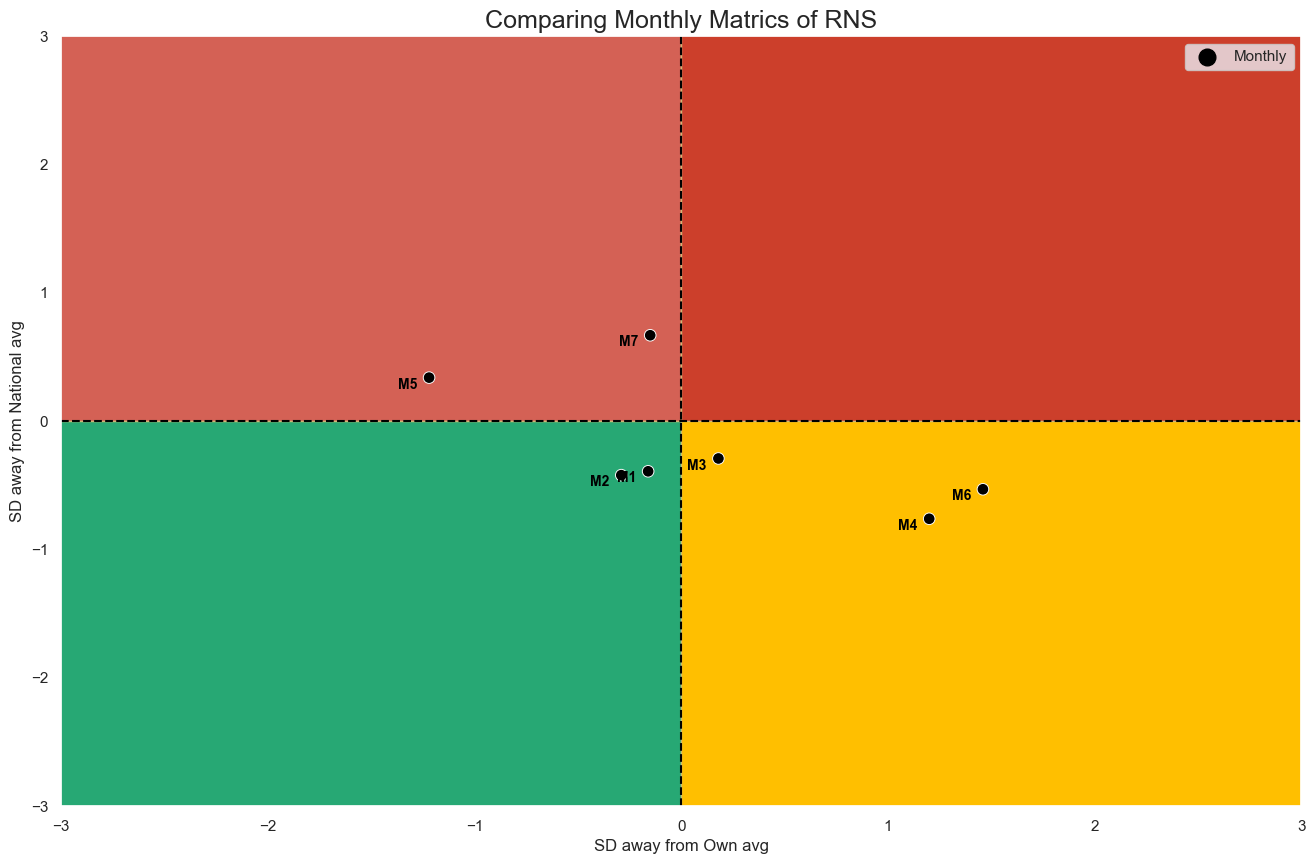

In [29]:

scatter_plot_for_provider(uk_data,catagory="Monthly")

array(['AandE_Attends_Type1',
       'Attends_Under_4Hrs_Arr_To_Adm_Tfr_Disch_Type1',
       'Attends_Over_4Hrs_Arr_To_Adm_Tfr_Disch_Type1',
       'Emerg_Adms_Via_Type1', 'Emerg_Adms_Not_Via_AandE',
       'Dec_To_Adm_4_to_12Hrs', 'Dec_To_Adm_Over_12Hrs',
       'Daily_Average_Staff_Absence', 'Arriving_by_ambulance',
       'Time_Lost_to_Ambulance_Handover_Delays_Hours',
       'Monthly_Avg_Patients_who_no_longer_meet_the_criteria_to_reside',
       'Daily_Avg_Bed_Occupancy_over_7_days',
       'Daily_Avg_Bed_Occupancy_over_14_days',
       'Daily_Avg_Bed_Occupancy_over_21_days'], dtype=object)

C:\Users\Hp\AppData\Local\Temp\ipykernel_15196\3571055765.py:35: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(
C:\Users\Hp\AppData\Local\Temp\ipykernel_15196\3571055765.py:35: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(


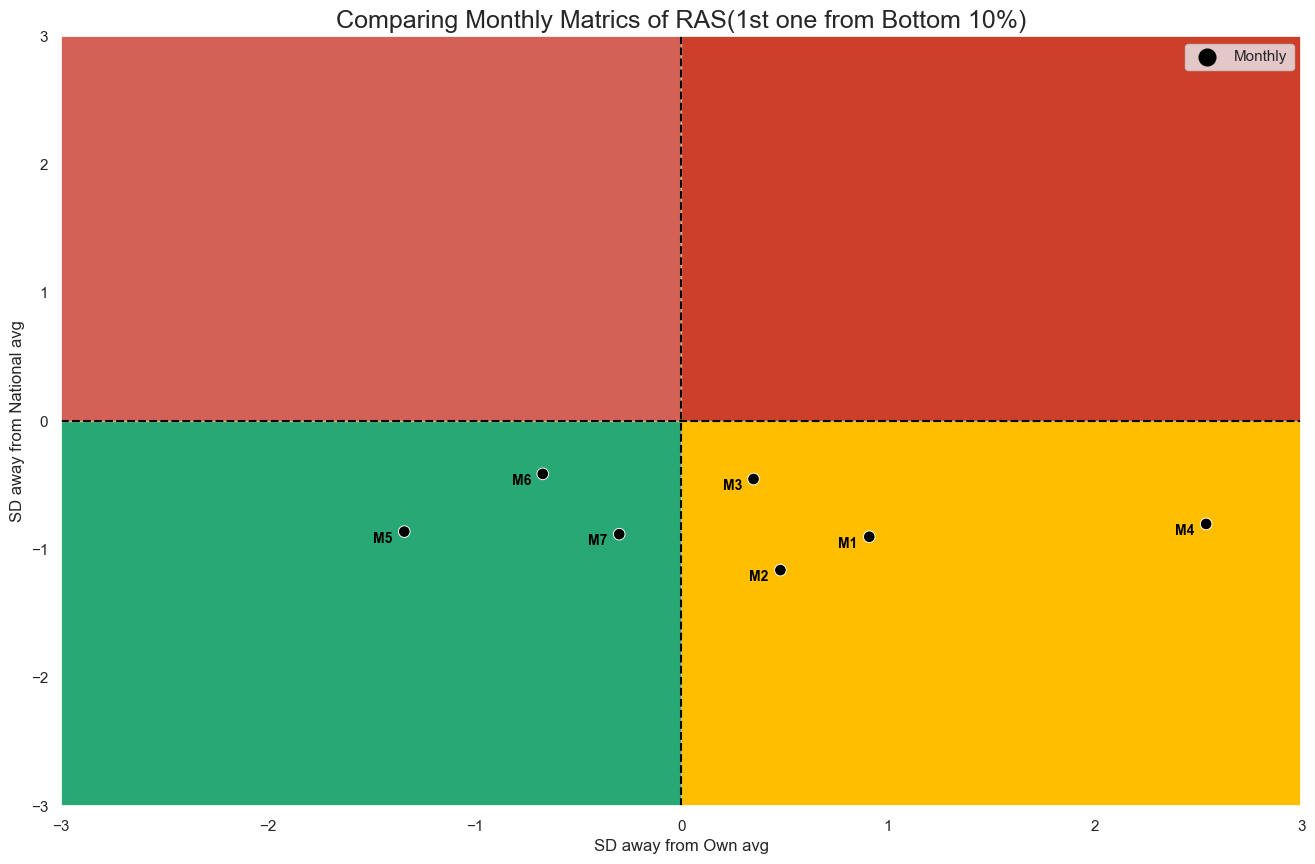

In [35]:
pc_from_top10 = uk_data[uk_data['Provider Group Level based on AandE Type 1']=="Bottom 10%"].iloc[0,:]["Provider Code"]

scatter_plot_for_provider(uk_data,catagory="Monthly",provider_code=pc_from_top10,append_title="(1st one from Bottom 10%)")

In [50]:
uk_data["Metric"].unique()

array(['AandE_Attends_Type1',
       'Attends_Under_4Hrs_Arr_To_Adm_Tfr_Disch_Type1',
       'Attends_Over_4Hrs_Arr_To_Adm_Tfr_Disch_Type1',
       'Emerg_Adms_Via_Type1', 'Emerg_Adms_Not_Via_AandE',
       'Dec_To_Adm_4_to_12Hrs', 'Dec_To_Adm_Over_12Hrs',
       'Daily_Average_Staff_Absence', 'Arriving_by_ambulance',
       'Time_Lost_to_Ambulance_Handover_Delays_Hours',
       'Monthly_Avg_Patients_who_no_longer_meet_the_criteria_to_reside',
       'Daily_Avg_Bed_Occupancy_over_7_days',
       'Daily_Avg_Bed_Occupancy_over_14_days',
       'Daily_Avg_Bed_Occupancy_over_21_days'], dtype=object)

## Experimanting on charts

In [23]:
def scatter_plot_circular_matrics(uk_data,matrics=["AandE_Attends_Type1"]):

    uk_data = uk_data[uk_data["Provider Group Level based on AandE Type 1"]!="Bet Bottom & Top"]
    uk_data = uk_data[uk_data["Metric"].isin(matrics)]

    # Set the default seaborn style
    sns.set(rc={'figure.figsize':(10,10)})

    ax = plt.gca()
    plt.grid(False)


    

    good_indicators = ['AandE_Attends_Type1',
       'Attends_Under_4Hrs_Arr_To_Adm_Tfr_Disch_Type1',
       'Emerg_Adms_Via_Type1', 
       'Emerg_Adms_Not_Via_AandE',
       'Arriving_by_ambulance',]
    
    r = '#db0000'
    y = '#ffbf00'
    g = '#27a800'
    

    # if matrics[0] in good_indicators:
    #     r,g = g,r


    # Add rectangle patches with background color
    rect1 = plt.Circle((-4, -4), 8, linewidth=0, facecolor=r)
    rect2 = plt.Circle((-4, -4), 6, linewidth=0, facecolor=y)
    rect3 = plt.Circle((-4, -4), 4, linewidth=0, facecolor=g)
    # rect4 = plt.Circle((-4, -4), 2, linewidth=0, facecolor='#')

    # Add the rectangles to the plot
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    # ax.add_patch(rect4)



    # # Add vertical and horizontal lines
    # plt.axvline(x=0, color='white', linestyle='--')  # Vertical line at x=0
    # plt.axhline(y=0, color='white', linestyle='--')  # Horizontal line at y=0


    # Create the scatter plot using seaborn
    sns.scatterplot(
        data=uk_data, 
        x='SD away from Hospital Average', 
        y='SD away from National Average',  
        legend='brief', 
        style="Provider Group Level based on AandE Type 1",
        hue="Provider Group Level based on AandE Type 1",
        s=70,
        markers=['o', '^'],
        palette=['black','green']
        )

    # Set plot limits
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

    # fig, ax = plt.subplots()
    # ax.annotate('tessst', xy=(0,0), xytext=(0,0), xycoords='axes fraction', textcoords='offset points', ha='right')


    for (xi, yi, pc) in zip(uk_data['SD away from Hospital Average'], uk_data['SD away from National Average'], uk_data["Provider Code"] ):
        plt.text(xi, yi, pc+"   ", va='top', ha='right', color="black", fontweight="semibold", fontsize=10, 
                #  bbox=dict(boxstyle='square,pad=0.5', fc='#ffffff50', ec='none') 
                )


    # Add labels and title
    # Add labels and title
    title = " ".join(str(item) for item in matrics[0].split('_'))
    plt.xlabel('SD away from Own avg')
    plt.ylabel('SD away from National avg')
    plt.title('Comparing Top & Bottom 10% Hospitals\n' + title + " Performance", fontsize=18)
    plt.legend(markerscale=2)

    # plt.imsave()
    plt.savefig('images/Forrester_Wave_Plots/'+matrics[0]+'.png', dpi='figure', format=None)

    # Display the plot
    plt.show()

In [12]:
uk_data.Metric

0                                     AandE_Attends_Type1
1           Attends_Under_4Hrs_Arr_To_Adm_Tfr_Disch_Type1
2            Attends_Over_4Hrs_Arr_To_Adm_Tfr_Disch_Type1
3                                    Emerg_Adms_Via_Type1
4                                Emerg_Adms_Not_Via_AandE
                              ...                        
1461         Time_Lost_to_Ambulance_Handover_Delays_Hours
1462    Monthly_Avg_Patients_who_no_longer_meet_the_cr...
1463                  Daily_Avg_Bed_Occupancy_over_7_days
1464                 Daily_Avg_Bed_Occupancy_over_14_days
1465                 Daily_Avg_Bed_Occupancy_over_21_days
Name: Metric, Length: 1466, dtype: object

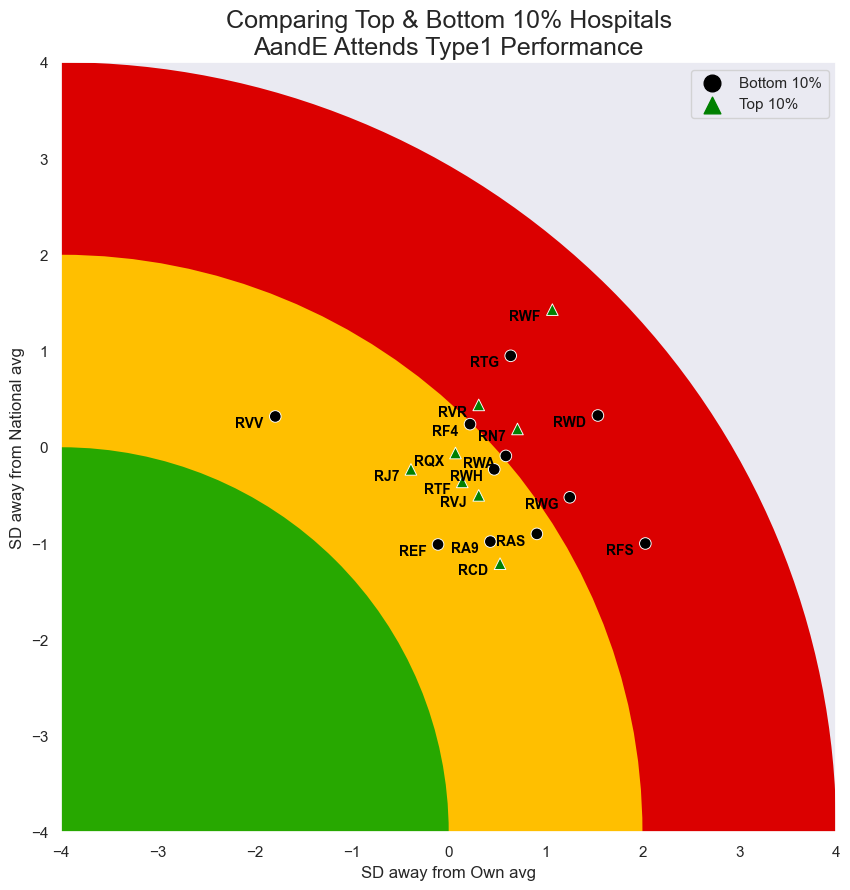

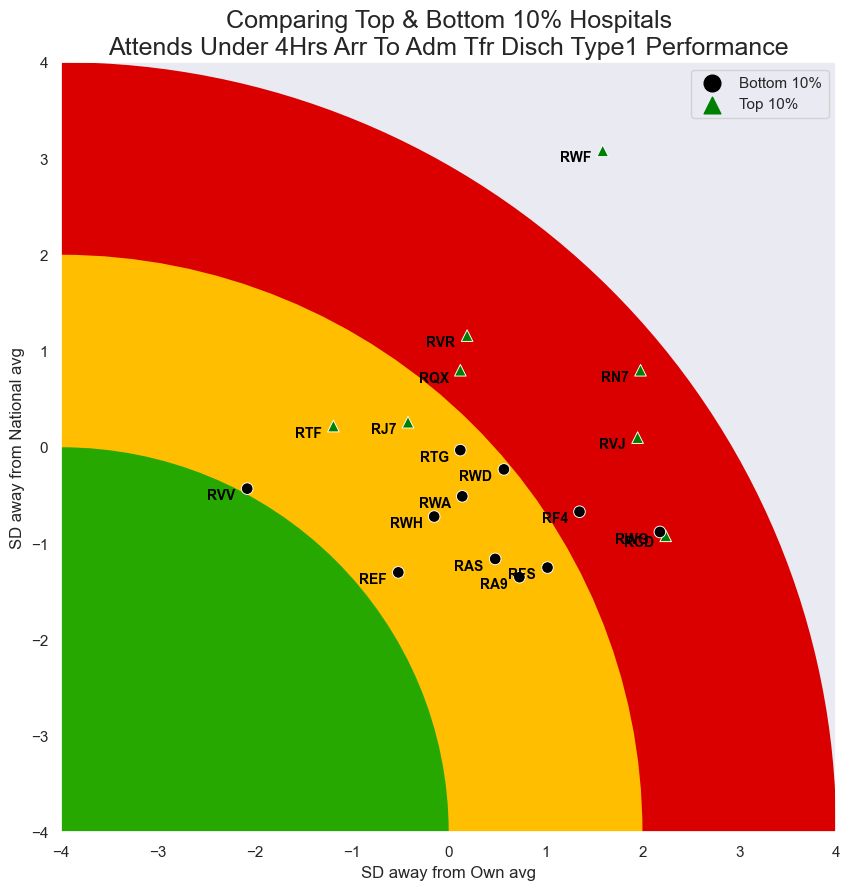

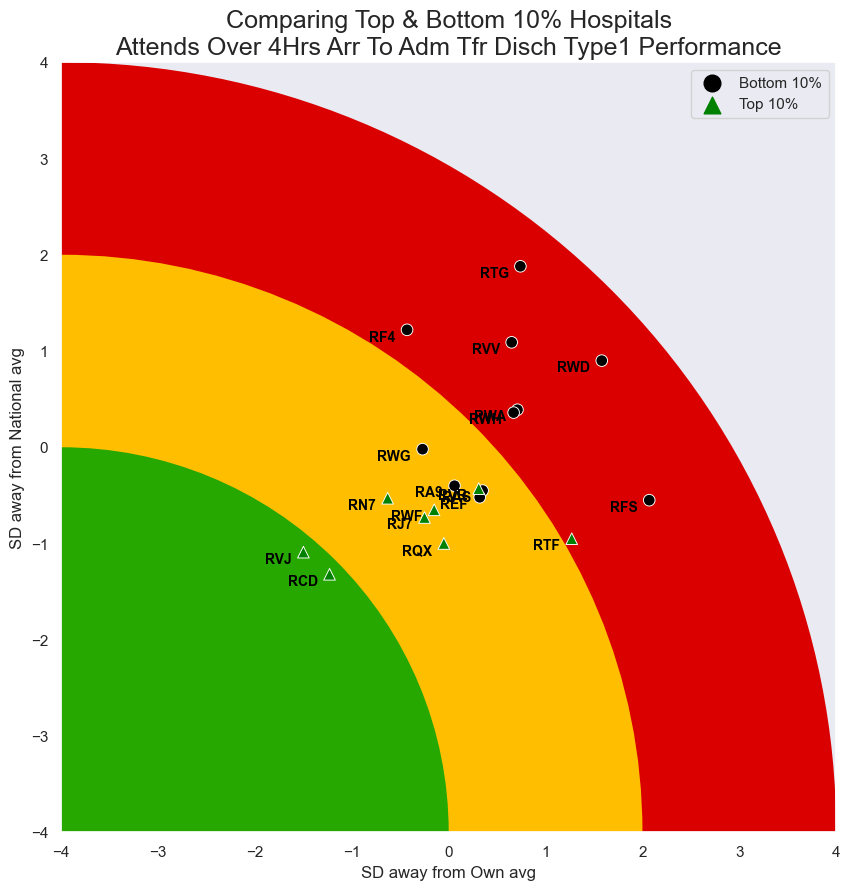

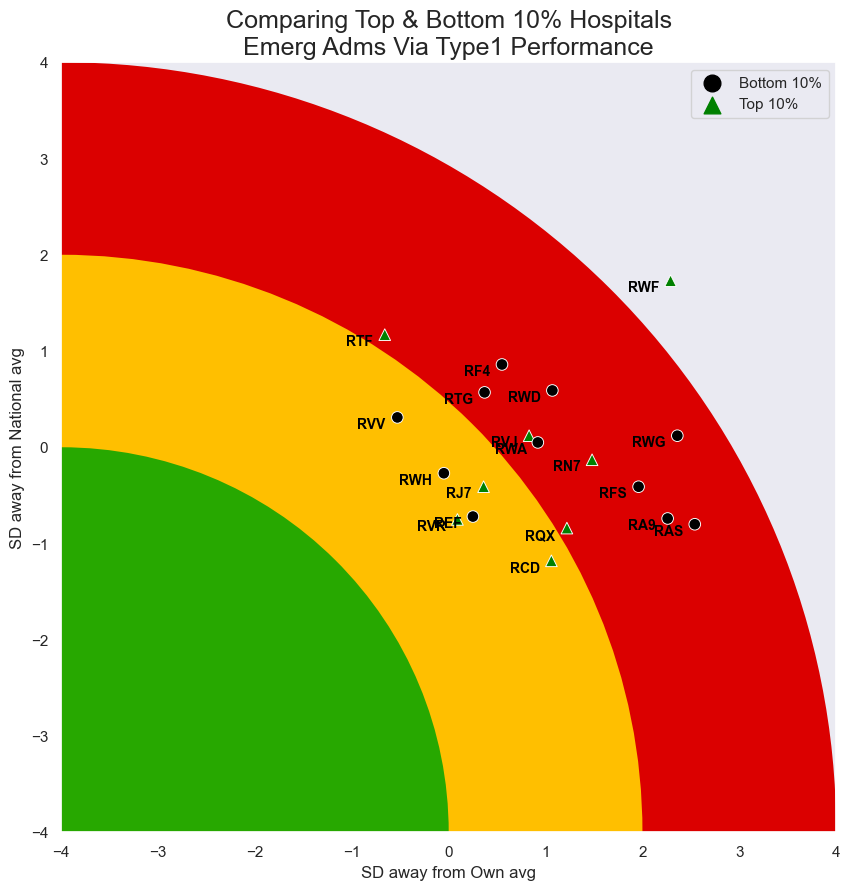

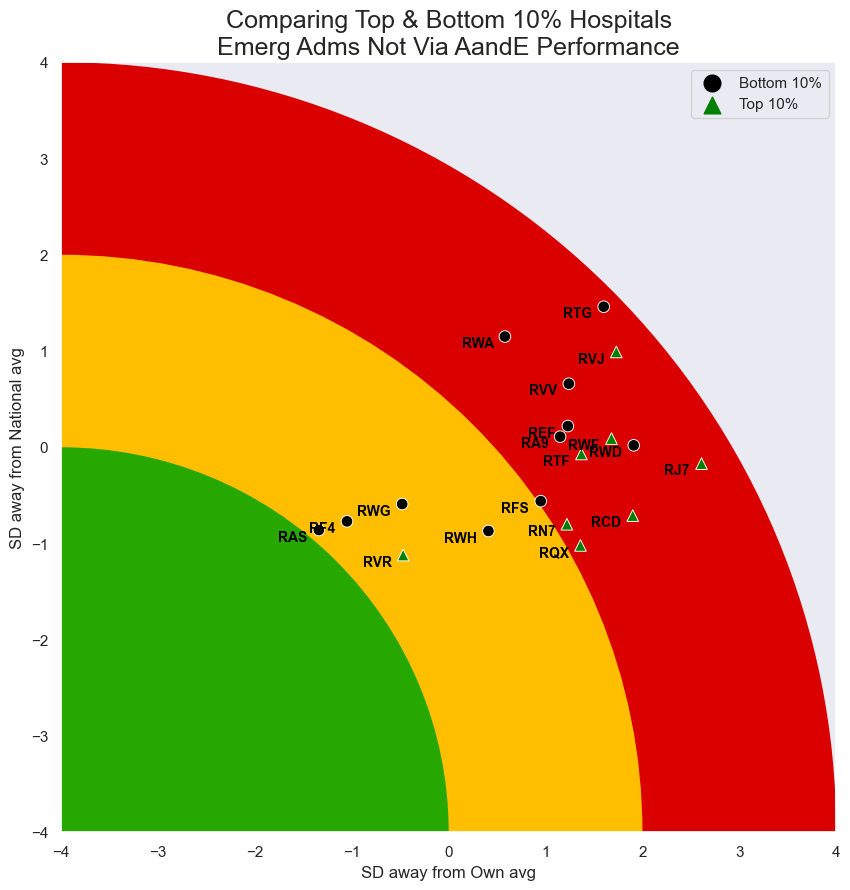

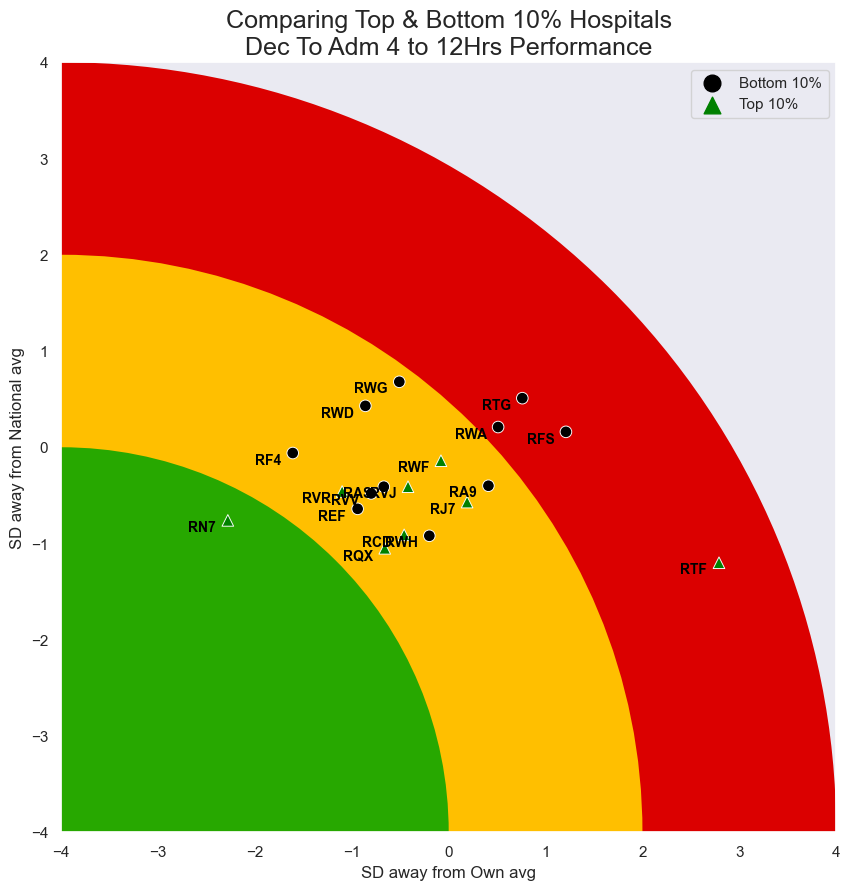

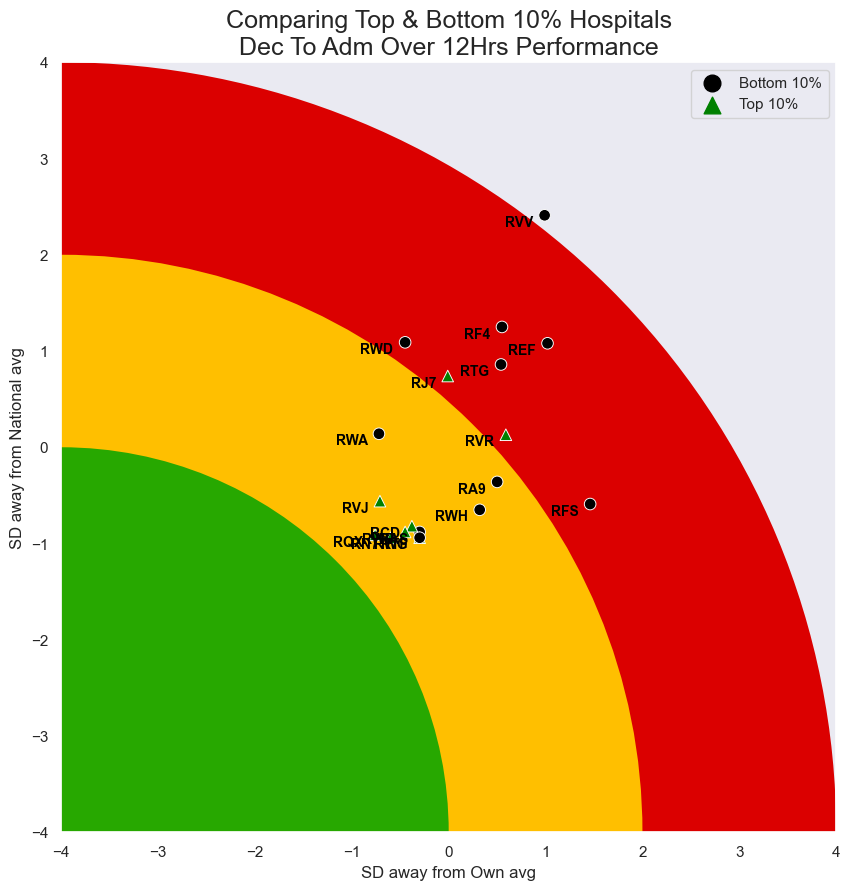

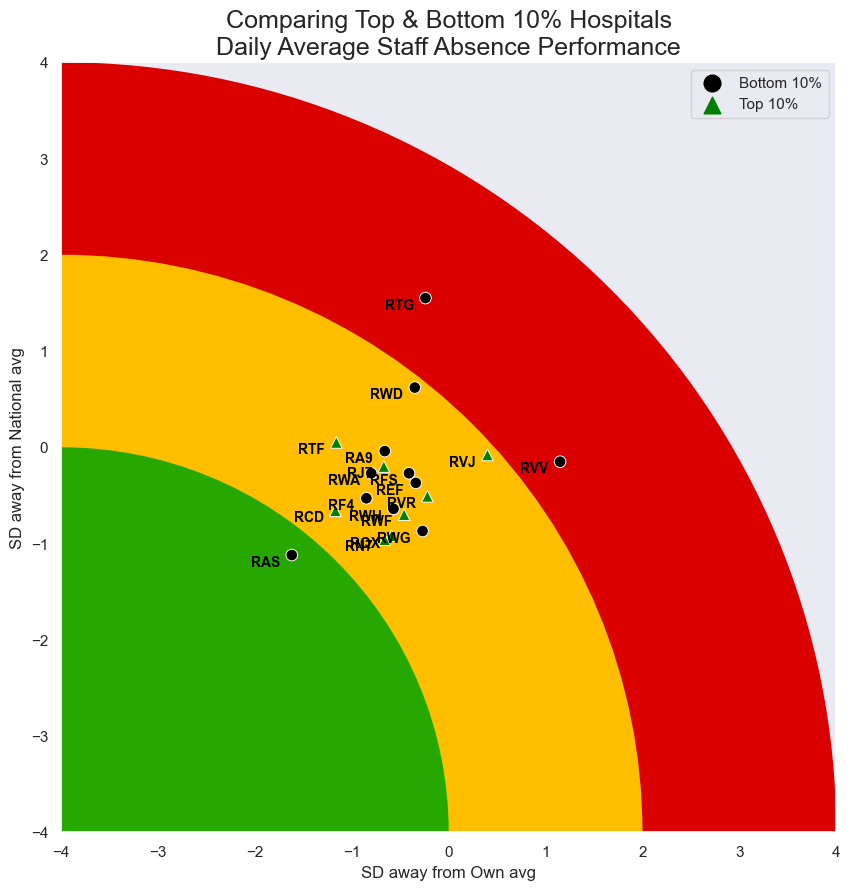

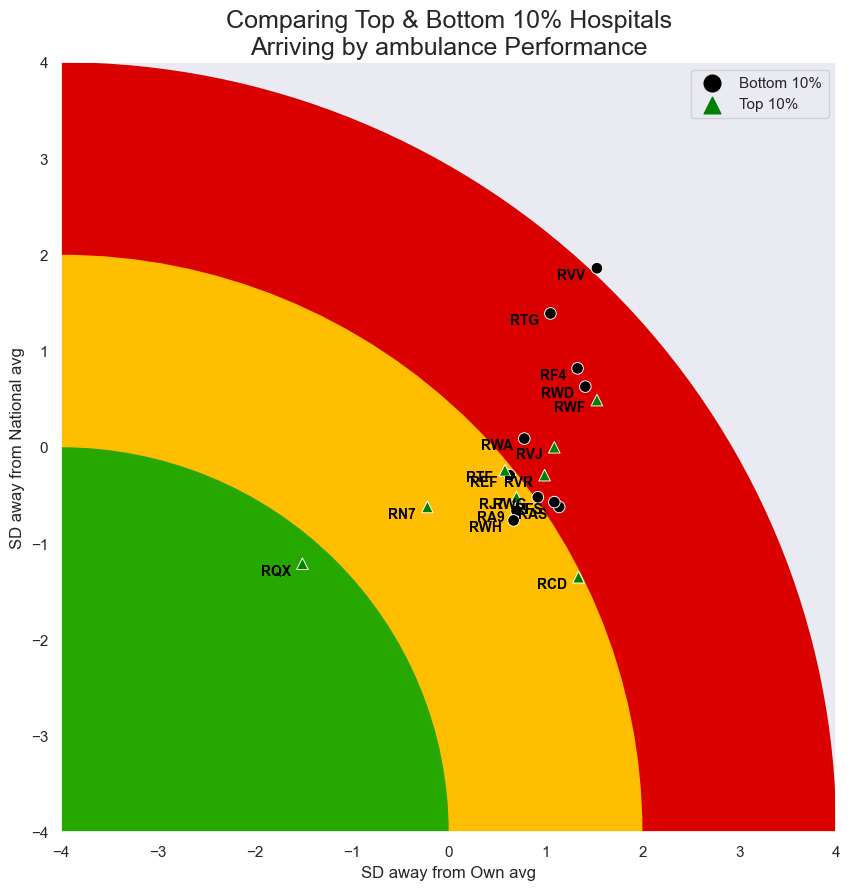

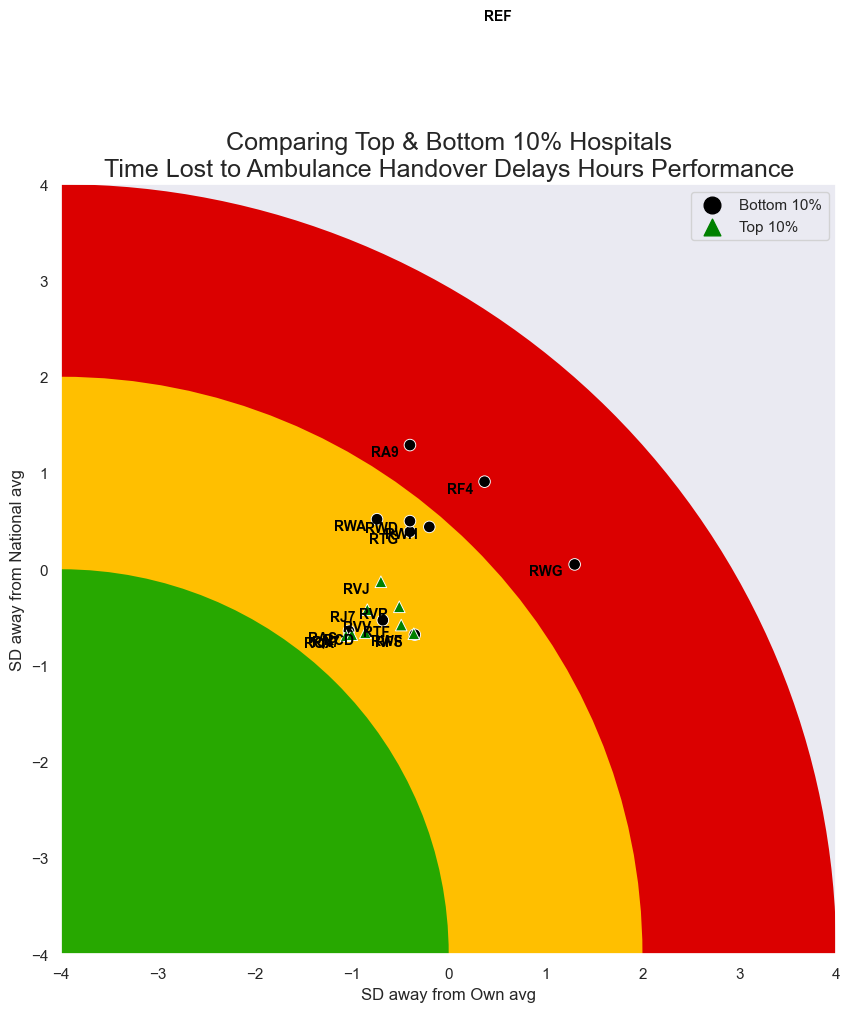

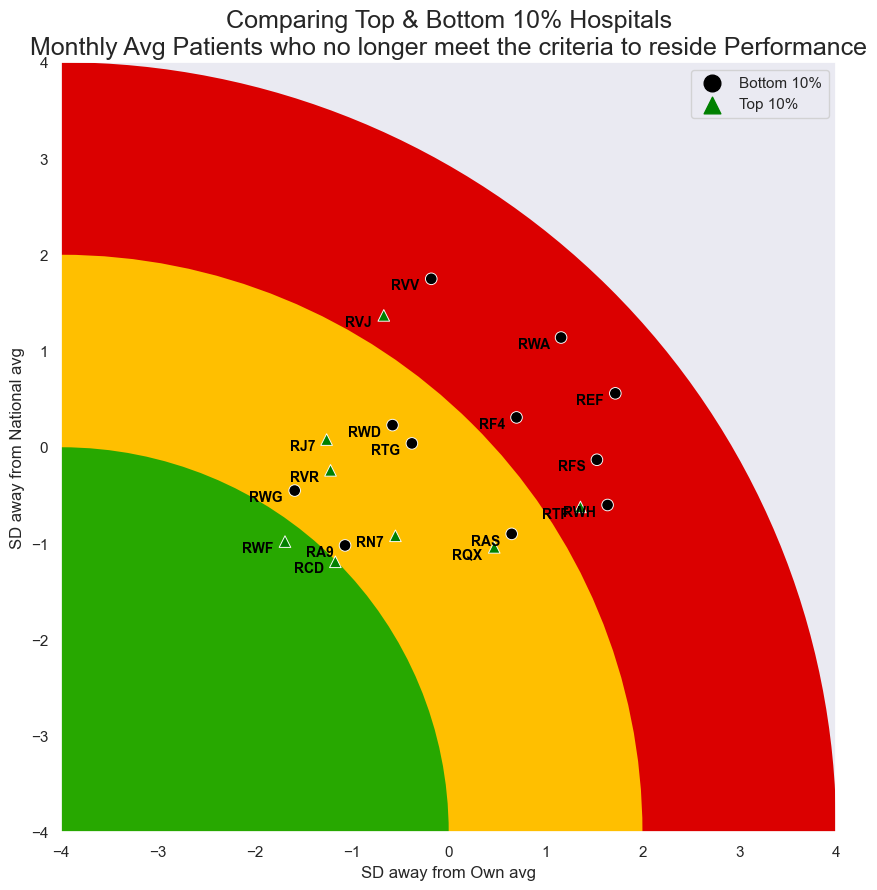

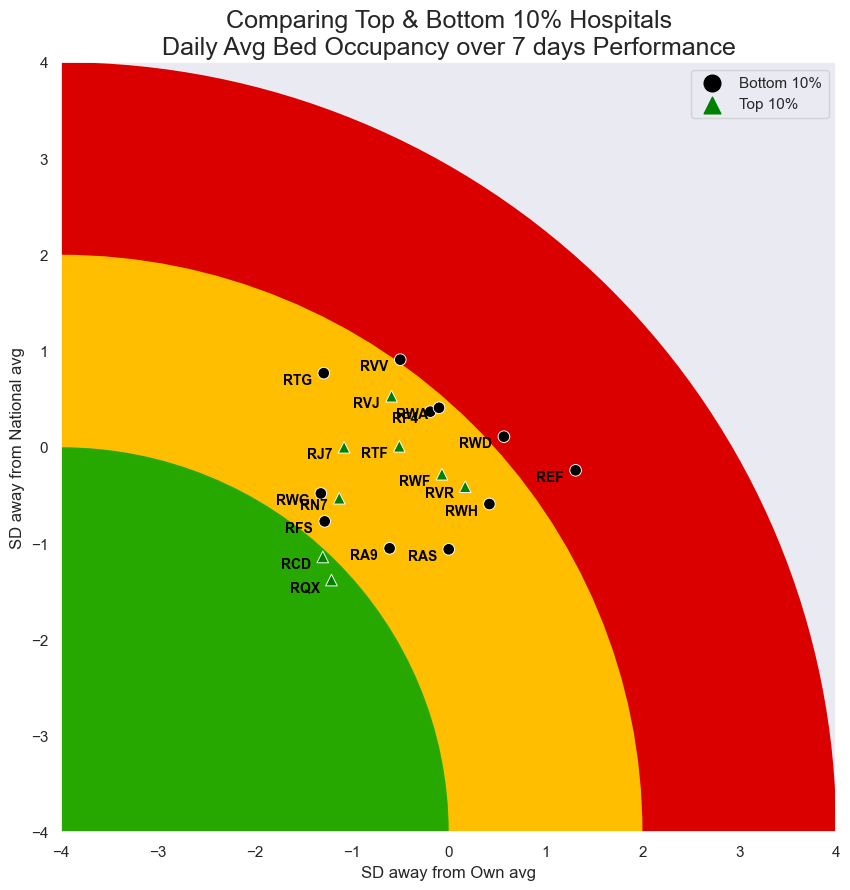

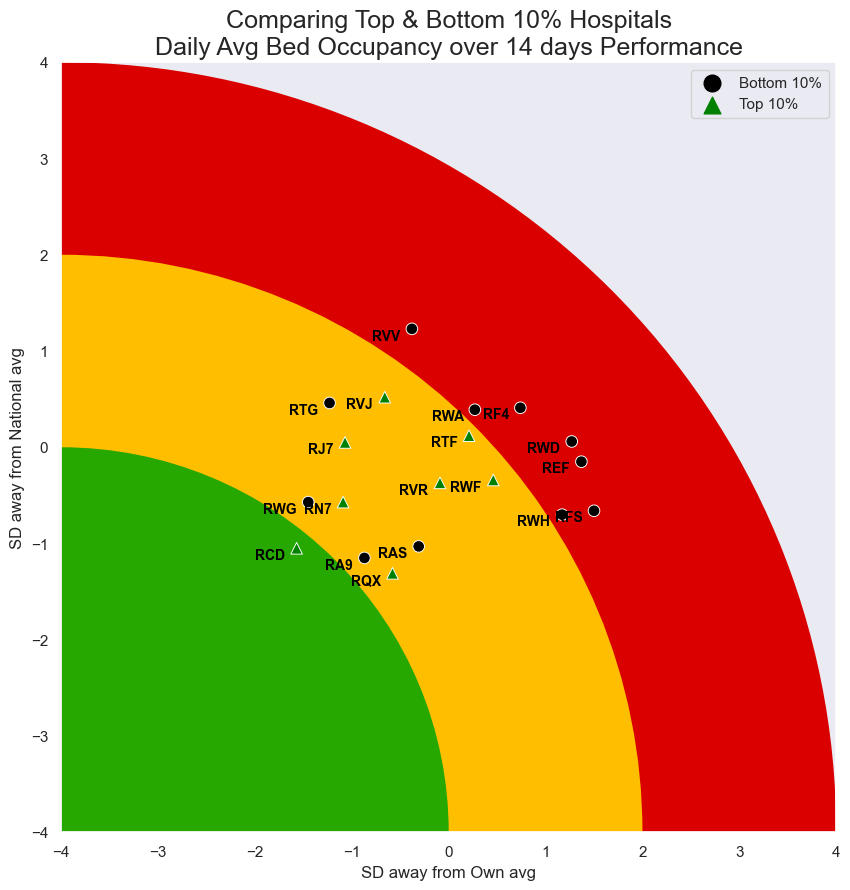

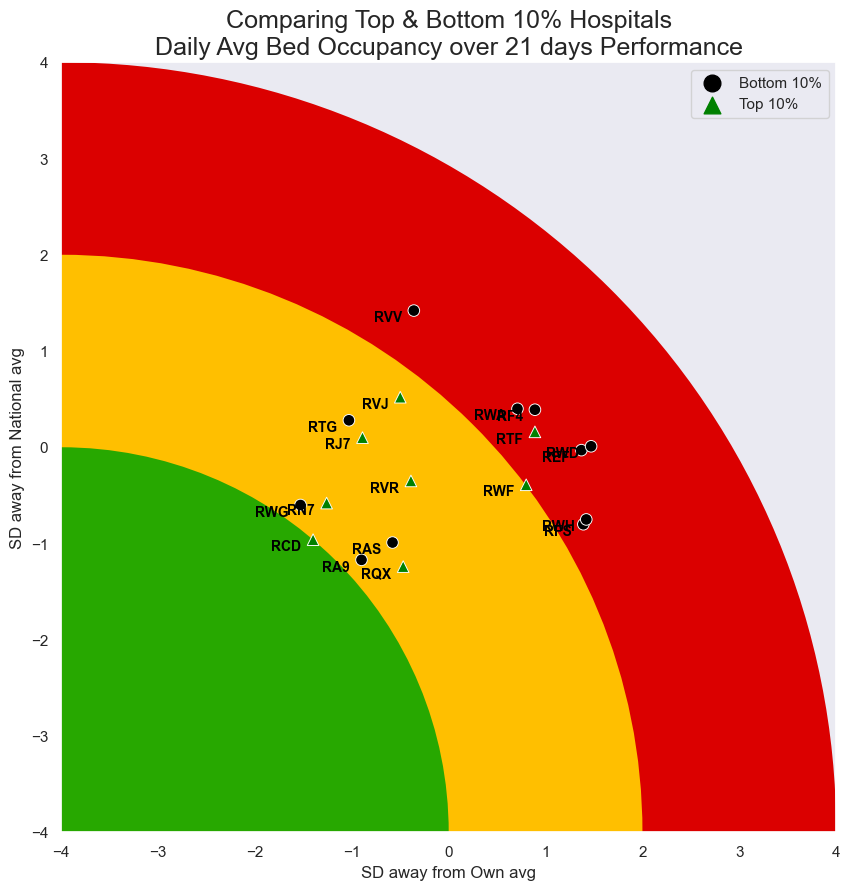

In [24]:
for i in uk_data["Metric"].unique():
    scatter_plot_circular_matrics(uk_data,[i])


## provider level

In [23]:
def scatter_plot_circuler_for_provider(uk_data,provider_code="RNS",catagory="All",append_title=""):

    uk_data = uk_data[uk_data["Provider Code"]==provider_code]

    if catagory=="Daily" or catagory=="Monthly":
        uk_data = uk_data[uk_data["Metrices Type"]==catagory]


    # Set the default seaborn style
    sns.set(rc={'figure.figsize':(10,10)})

    ax = plt.gca()
    plt.grid(False)


    
    



    # Add rectangle patches with background color
    rect1 = plt.Circle((-4, -4), 8, linewidth=0, facecolor='#db0000')
    rect2 = plt.Circle((-4, -4), 6, linewidth=0, facecolor='#ffbf00')
    rect3 = plt.Circle((-4, -4), 4, linewidth=0, facecolor='#27a800')
    # rect4 = plt.Circle((-4, -4), 2, linewidth=0, facecolor='#')

    # Add the rectangles to the plot
    ax.add_patch(rect1)
    ax.add_patch(rect2)
    ax.add_patch(rect3)
    # ax.add_patch(rect4)


    # plt.scatter(x, y, c=scatter_colors, s=40.0,marker="*")

    # # Add vertical and horizontal lines
    # plt.axvline(x=0, color='black', linestyle='--')  # Vertical line at x=0
    # plt.axhline(y=0, color='black', linestyle='--')  # Horizontal line at y=0


    # Create the scatter plot using seaborn
    sns.scatterplot(
        data=uk_data, 
        x='SD away from Hospital Average', 
        y='SD away from National Average',  
        legend='brief', 
        style="Metrices Type",
        hue="Metrices Type",
        s=70,
        markers=['o', '^'],
        palette=['black','green']
        )

    # Set plot limits
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

    # fig, ax = plt.subplots()
    # ax.annotate('tessst', xy=(0,0), xytext=(0,0), xycoords='axes fraction', textcoords='offset points', ha='right')


    for (xi, yi, pc) in zip(uk_data['SD away from Hospital Average'], uk_data['SD away from National Average'], uk_data["Label"] ):
        plt.text(xi, yi, pc+"   ", va='top', ha='right', color="black", fontweight="semibold", fontsize=10, 
                #  bbox=dict(boxstyle='square,pad=0.5', fc='#ffffff50', ec='none') 
                )


    # Add labels and title
    # Add labels and title
    
    plt.xlabel('SD away from Own avg')
    plt.ylabel('SD away from National avg')
    plt.title('Comparing '+catagory+' Matrics of ' + provider_code+append_title, fontsize=18)
    plt.legend(markerscale=2)

    # plt.imsave()
    plt.savefig('images/Forrester_Wave_Plots/providers_level/'+provider_code+'_'+catagory+'.png', dpi='figure', format=None)

    # Display the plot
    plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_10364\3859447769.py:42: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(
C:\Users\Hp\AppData\Local\Temp\ipykernel_10364\3859447769.py:42: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(


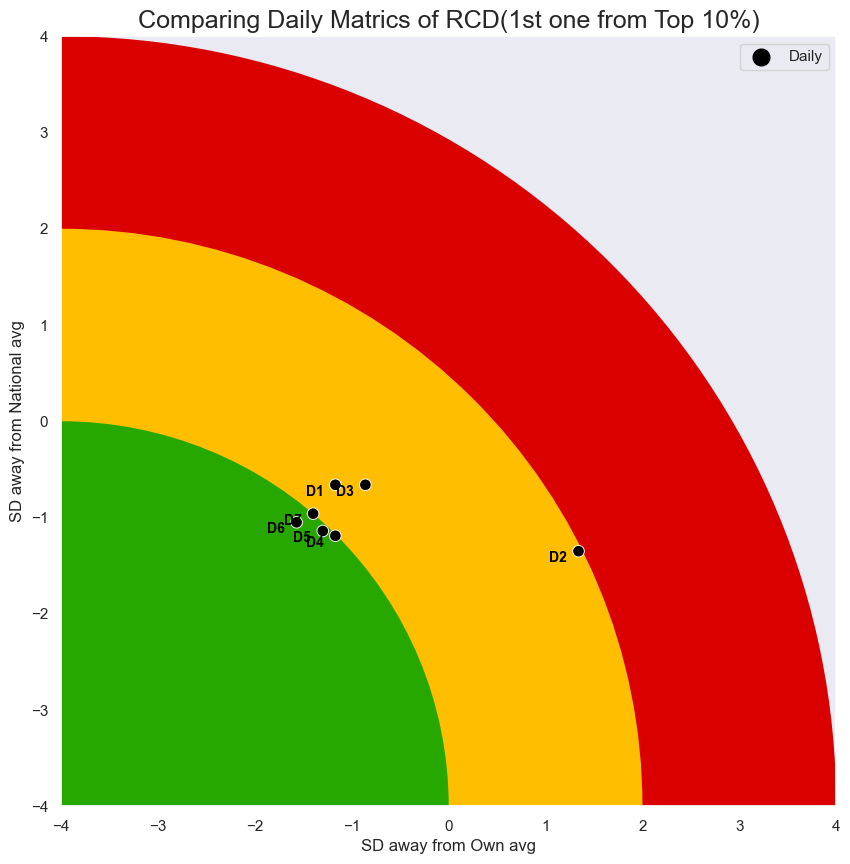

In [32]:
pc_from_top10 = uk_data[uk_data['Provider Group Level based on AandE Type 1']=="Top 10%"].iloc[0,:]["Provider Code"]

scatter_plot_circuler_for_provider(uk_data,catagory="Daily",provider_code=pc_from_top10,append_title="(1st one from Top 10%)")